<a href="https://colab.research.google.com/github/aMurryFly/nlp_course/blob/main/practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1: Tokenización de corpus en subpalabras


**Integrantes:**
1. 
2. Murrieta Villegas Alfonso
3. Salas Mora Mónica

# 1. Escoger un corpus 

Escoger un corpus de cualquier idioma y de un tamaño mayor a 10 000
tokens (se puede tomar este corpus de la paqueter ́ıa nltk.corpus). Este
corpus se usar a a lo largo del curso.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
urlData = 'https://raw.githubusercontent.com/aMurryFly/nlp_course/main/data/final_news_df.csv'
data = pd.read_csv(urlData, encoding='latin1')

In [ ]:
data.head()

,category,headline,short_description,date,keywords
0,BUSINESS,America's Most Expensive Neighborhoods: 24/7 W...,"A little-known Northern California town, estab...",2012-11-11,NaN
1,BUSINESS,Investment Crowdfunding Draws a Crowd,It's getting crowded in the investment crowdfu...,2015-03-02,investment-crowdfunding-draw
2,BUSINESS,Office Romances Often Sparked By Emoticon-Lace...,But even though they might literally be sendin...,2012-08-26,office-romances-emoticons
3,BUSINESS,Verizon Could Buy Yahoo In The Next Few Days,A deal could be coming soon.,2016-07-22,verizon-could-buy-yahoo-next-few-days
4,BUSINESS,What's Your Meeting Brand?,Many leaders operate as if their meeting brand...,2014-06-11,whats-your-meeting-brand


## 1.1 Análsis exploratorio 

**Cantidad de datos nulos por cada columna o atributo de nuestro dataset**


In [ ]:
explordata= data 

nullValues= data.isnull().sum().sort_values(ascending=False)
total =explordata.shape[0]

percent_missing= (explordata.isnull().sum()/total).sort_values(ascending=False)
loss_data= pd.concat([nullValues, percent_missing], axis=1, keys=['Datos nulos', 'Porcetaje'])
print (loss_data)

                   Datos nulos  Porcetaje
keywords                  1982   0.066067
date                         0   0.000000
short_description            0   0.000000
headline                     0   0.000000
category                     0   0.000000


**Cantidad de datos repetidos por cada columna o atributo de nuestro dataset**

NOTA: No por que el titular se repita en algunos casos significa que tengamos información repetida

In [ ]:
print('Total de datos: ', explordata.shape[0])
print('Total de datos o noticias respecto al titular (Sin repetir alguno): ', explordata['headline'].nunique())

Total de datos:  30000
Total de datos o noticias respecto al titular (Sin repetir alguno):  27933


**Distribución de datos respecto a la categoría asociada al tipo de noticia**

In [ ]:
print(explordata.category.value_counts())

FOOD & DRINK    5000
PARENTING       5000
WELLNESS        5000
WORLD NEWS      5000
BUSINESS        5000
POLITICS        5000
Name: category, dtype: int64


In [ ]:
pre_class_allData = explordata.groupby('category').count()['short_description'].reset_index().sort_values(by='short_description',ascending=False)
percent_class= pre_class_allData.short_description
labels= pre_class_allData.category

**Distribución de datos y sus categorías**

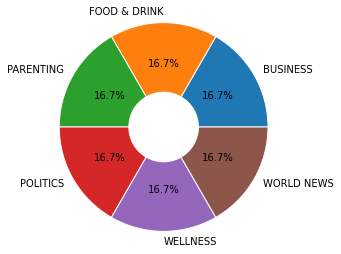

In [ ]:
my_pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=labels,autopct="%.1f%%")
plt.setp(my_pie, width=0.8, edgecolor='white') 
plt.show()

# 2. Limpiar el corpus: 

**ACTIVIDAD** 

*Eliminar signos de puntuaci on, de interrogación, admiración y elementos no léxicos (En general aquellos elementos ruidosos)*



### 2.0 Ambiente y funciones
**Importando biblioteca para el manejo de datos en el Procesamiento del Lenguaje Natural**

In [ ]:
import nltk
from nltk.corpus import stopwords

**Importación de stopwords para la omitir datos innecesarios dentro de las noticias**

In [ ]:
def create_corpus(target):
    corpus=[]
    
    for x in dataFrame[dataFrame['category']==target ]['short_description'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

**Funciones destinadas a la limpieza de datos**

In [ ]:
def turn_lower(text):
    low_text= text.lower()
    return low_text

In [ ]:
import re
def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct

In [ ]:
def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove

In [ ]:
def auxiliar_trash(text):
  remove= re.sub(r'[%|á|â|³|²|ð|ã|å|¹|_|¼]', '', text)
  return remove

### 2.1 **Aplicando las funciones para la limpieza de los datos en contenido**

In [ ]:
data.head()

,category,headline,short_description,date,keywords
0,BUSINESS,America's Most Expensive Neighborhoods: 24/7 W...,"A little-known Northern California town, estab...",2012-11-11,NaN
1,BUSINESS,Investment Crowdfunding Draws a Crowd,It's getting crowded in the investment crowdfu...,2015-03-02,investment-crowdfunding-draw
2,BUSINESS,Office Romances Often Sparked By Emoticon-Lace...,But even though they might literally be sendin...,2012-08-26,office-romances-emoticons
3,BUSINESS,Verizon Could Buy Yahoo In The Next Few Days,A deal could be coming soon.,2016-07-22,verizon-could-buy-yahoo-next-few-days
4,BUSINESS,What's Your Meeting Brand?,Many leaders operate as if their meeting brand...,2014-06-11,whats-your-meeting-brand


In [ ]:
data['clean_description'] = data['short_description'].apply(lambda x:remove_stopwords(x))
data.head()

,category,headline,short_description,date,keywords,clean_description
0,BUSINESS,America's Most Expensive Neighborhoods: 24/7 W...,"A little-known Northern California town, estab...",2012-11-11,NaN,"A little-known Northern California town, estab..."
1,BUSINESS,Investment Crowdfunding Draws a Crowd,It's getting crowded in the investment crowdfu...,2015-03-02,investment-crowdfunding-draw,It's getting crowded investment crowdfunding s...
2,BUSINESS,Office Romances Often Sparked By Emoticon-Lace...,But even though they might literally be sendin...,2012-08-26,office-romances-emoticons,But even though might literally sending wrong ...
3,BUSINESS,Verizon Could Buy Yahoo In The Next Few Days,A deal could be coming soon.,2016-07-22,verizon-could-buy-yahoo-next-few-days,A deal could coming soon.
4,BUSINESS,What's Your Meeting Brand?,Many leaders operate as if their meeting brand...,2014-06-11,whats-your-meeting-brand,Many leaders operate meeting brand directly af...


In [ ]:
data['clean_description'] = data['clean_description'].apply(lambda x:turn_lower(x))
data['clean_description'] = data['clean_description'].apply(lambda x:punct_remove(x))
data['clean_description'] = data['clean_description'].apply(lambda x:remove_num(x))
data['clean_description'] = data['clean_description'].apply(lambda x:auxiliar_trash(x))
data.head()

,category,headline,short_description,date,keywords,clean_description
0,BUSINESS,America's Most Expensive Neighborhoods: 24/7 W...,"A little-known Northern California town, estab...",2012-11-11,NaN,a littleknown northern california town establi...
1,BUSINESS,Investment Crowdfunding Draws a Crowd,It's getting crowded in the investment crowdfu...,2015-03-02,investment-crowdfunding-draw,its getting crowded investment crowdfunding sp...
2,BUSINESS,Office Romances Often Sparked By Emoticon-Lace...,But even though they might literally be sendin...,2012-08-26,office-romances-emoticons,but even though might literally sending wrong ...
3,BUSINESS,Verizon Could Buy Yahoo In The Next Few Days,A deal could be coming soon.,2016-07-22,verizon-could-buy-yahoo-next-few-days,a deal could coming soon
4,BUSINESS,What's Your Meeting Brand?,Many leaders operate as if their meeting brand...,2014-06-11,whats-your-meeting-brand,many leaders operate meeting brand directly af...


### 2.2 Aplicando las funciones para la limpieza de los datos en título o header 

In [ ]:
data.head()

,category,headline,short_description,date,keywords,clean_description
0,BUSINESS,America's Most Expensive Neighborhoods: 24/7 W...,"A little-known Northern California town, estab...",2012-11-11,NaN,a littleknown northern california town establi...
1,BUSINESS,Investment Crowdfunding Draws a Crowd,It's getting crowded in the investment crowdfu...,2015-03-02,investment-crowdfunding-draw,its getting crowded investment crowdfunding sp...
2,BUSINESS,Office Romances Often Sparked By Emoticon-Lace...,But even though they might literally be sendin...,2012-08-26,office-romances-emoticons,but even though might literally sending wrong ...
3,BUSINESS,Verizon Could Buy Yahoo In The Next Few Days,A deal could be coming soon.,2016-07-22,verizon-could-buy-yahoo-next-few-days,a deal could coming soon
4,BUSINESS,What's Your Meeting Brand?,Many leaders operate as if their meeting brand...,2014-06-11,whats-your-meeting-brand,many leaders operate meeting brand directly af...


In [ ]:
data['clean_headline'] = data['headline'].apply(lambda x:remove_stopwords(x))
data['clean_headline'] = data['clean_headline'].apply(lambda x:turn_lower(x))
data['clean_headline'] = data['clean_headline'].apply(lambda x:punct_remove(x))
data['clean_headline'] = data['clean_headline'].apply(lambda x:remove_num(x))
data.head()

,category,headline,short_description,date,keywords,clean_description,clean_headline
0,BUSINESS,America's Most Expensive Neighborhoods: 24/7 W...,"A little-known Northern California town, estab...",2012-11-11,NaN,a littleknown northern california town establi...,americas most expensive neighborhoods wall st
1,BUSINESS,Investment Crowdfunding Draws a Crowd,It's getting crowded in the investment crowdfu...,2015-03-02,investment-crowdfunding-draw,its getting crowded investment crowdfunding sp...,investment crowdfunding draws crowd
2,BUSINESS,Office Romances Often Sparked By Emoticon-Lace...,But even though they might literally be sendin...,2012-08-26,office-romances-emoticons,but even though might literally sending wrong ...,office romances often sparked by emoticonlaced...
3,BUSINESS,Verizon Could Buy Yahoo In The Next Few Days,A deal could be coming soon.,2016-07-22,verizon-could-buy-yahoo-next-few-days,a deal could coming soon,verizon could buy yahoo in the next few days
4,BUSINESS,What's Your Meeting Brand?,Many leaders operate as if their meeting brand...,2014-06-11,whats-your-meeting-brand,many leaders operate meeting brand directly af...,whats your meeting brand


### 2.3 Omitiendo datos innecesarios

In [ ]:
data = data.drop(['date'], axis='columns')
data.tail()

,category,headline,short_description,keywords,clean_description,clean_headline
29995,WORLD NEWS,"As A Refugee First-Responder, I've Seen People...",Many are willing to endure unthinkable horror ...,as-a-refugee-first-responder-ive-seen-people-r...,many willing endure unthinkable horror escape ...,as a refugee firstresponder ive seen people ri...
29996,WORLD NEWS,Why I No Longer Support Israel,Israel is facing the same kind of struggle tha...,why-i-no-longer-support-i,israel facing kind struggle many countries enc...,why i no longer support israel
29997,WORLD NEWS,The Fate Of Europe Rests On The French-German ...,Macron and Merkel must figure out a common way...,eu-france-germany,macron merkel must figure common way forward o...,the fate of europe rests on the frenchgerman p...
29998,WORLD NEWS,"Gunmen Kill Miriam Rodriguez, Activist Who Sea...",âMexico has become a very dangerous place fo...,miriam-rodriguez-died,mexico become dangerous place courage devote l...,gunmen kill miriam rodriguez activist who sear...
29999,WORLD NEWS,Longtime Refugees Grateful for Citizenship in ...,Freedom. Happiness. Gratitude. These are words...,longtime-refugees-gratefu,freedom happiness gratitude these words people...,longtime refugees grateful citizenship tanzania


# 3. Aplicar el algoritmo de BPE al corpus para obtener subpalabras:


##3.1 Formación del vocabulario inicial: 

**Cada palabra se asocia a la cadena de caracteres.**


In [ ]:
import re
from collections import Counter, defaultdict

In [ ]:
##obtenemos la columna que aplicaremos BPE
tokens = []
bpe = data['clean_description'].tolist()
for renglon in bpe:
  palabras = renglon.split()
  for p in palabras:
    tokens.append(p)

len(tokens)

424174

In [ ]:
def construir_vocabulario(vocab):
  vocabulario={}

  for t in tokens:
    #Separe cada carácter en la palabra por espacio
    separacion = " ".join(t)
    vocabulario[separacion]= len(t)

  return vocabulario

In [ ]:
def pares_simbolos(vocab):

    pairs = defaultdict(int)
    for word, frequency in vocab.items():
        symbols = word.split()

        # contando apariciones de pares
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += frequency

    return pairs

In [ ]:
def fusionar_vocab(pair: tuple, v_in: dict):
    #Combinar los pares más frecuentes
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    
    for word in v_in:
        # reemplazar el par más frecuente en todo el vocabulario
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]

    return v_out

In [ ]:
#eliminamos las palabras duplicadas
tokens = list(set(tokens))
len(tokens)
vocabulario = construir_vocabulario(tokens)
  #print(t)
  #print(f"vocabulario {c=c+1}")

#pares = pares_simbolos(vocabulario)

num_merges = 50  # Hyperparameter
for i in range(num_merges):

    #pairs = get_stats(vocab)  # Step 2
    pares = pares_simbolos(vocabulario)

    if not pares:
        break

    #best = {key: val for key, val in sorted(pares.items(), key = lambda ele: ele[0], reverse = True)}
    best = max(pares, key=pares.get)
    vocab = fusionar_vocab(best, vocabulario)

In [ ]:
print(vocabulario)


{'e m p l o y e e s': 9, 'e c l i p s e': 7, 'g o p n i k': 6, 'f i r s t a i d': 8, 'r e d u c e': 6, 'f l e s h': 5, 'p o s t e d': 6, 'f u n d e r': 6, 's t a r w o r t h y': 10, 's t a t i s t i c s': 10, 'b u r g e o n i n g': 10, 's a i d': 4, 'b o t h e r': 6, 't r u d e a u s': 8, 't i t a n s': 6, 'r i g h t': 5, 'k i d n e y': 6, 'p r e g n a n c y': 9, 'o r g a n i z e d': 9, 'd e c e a s e d': 8, 'p a t r i a r c h s': 10, 'l i t t l e k i d': 9, 'm o i s t r o a s t e d': 12, 'a m s t e r d a m s': 10, 's m a r t p h o n e': 10, 'i n d i c a t e s': 9, 'e l': 2, 'e n a b l e r s': 8, 'q u o t e s': 6, 't h i n n e r': 7, 'o n l o o k e r s': 9, 'e v a d e': 5, 'h o l o c a u s t': 9, 's e l e n e': 6, 's t o r y s': 6, 'g d p': 3, 'd i s p a t c h e d': 10, 'e x c e l l e n c e': 10, 'b o y l e': 5, 'd i a m o n d s': 8, 't h a t c h': 6, 'r u s s i a n i s r a e l i': 14, 'b l e a k': 5, 'i n c r i m i n a t i o n': 13, 'r a n i a': 5, 'f r e e d o m f l o t i l l a': 15,

In [ ]:
print(pares)

defaultdict(<class 'int'>, {('e', 'm'): 7545, ('m', 'p'): 5745, ('p', 'l'): 5065, ('l', 'o'): 9789, ('o', 'y'): 1035, ('y', 'e'): 1910, ('e', 'e'): 7037, ('e', 's'): 32528, ('e', 'c'): 9496, ('c', 'l'): 3357, ('l', 'i'): 19977, ('i', 'p'): 3275, ('p', 's'): 2204, ('s', 'e'): 15175, ('g', 'o'): 2870, ('o', 'p'): 5290, ('p', 'n'): 174, ('n', 'i'): 11263, ('i', 'k'): 1130, ('f', 'i'): 6299, ('i', 'r'): 6173, ('r', 's'): 12155, ('s', 't'): 26448, ('t', 'a'): 14867, ('a', 'i'): 6560, ('i', 'd'): 5917, ('r', 'e'): 33600, ('e', 'd'): 32428, ('d', 'u'): 2601, ('u', 'c'): 3087, ('c', 'e'): 11075, ('f', 'l'): 2902, ('l', 'e'): 21281, ('s', 'h'): 9051, ('p', 'o'): 7883, ('o', 's'): 7236, ('t', 'e'): 30834, ('f', 'u'): 3009, ('u', 'n'): 11385, ('n', 'd'): 14081, ('d', 'e'): 17663, ('e', 'r'): 43939, ('a', 'r'): 23602, ('r', 'w'): 731, ('w', 'o'): 2625, ('o', 'r'): 19677, ('r', 't'): 8117, ('t', 'h'): 10829, ('h', 'y'): 1697, ('a', 't'): 29746, ('t', 'i'): 36162, ('i', 's'): 19095, ('i', 'c'): 1598

In [ ]:
print(best)

('i', 'n')


In [ ]:
print(vocab)

{'e m p l o y e e s': 9, 'e c l i p s e': 7, 'g o p n i k': 6, 'f i r s t a i d': 8, 'r e d u c e': 6, 'f l e s h': 5, 'p o s t e d': 6, 'f u n d e r': 6, 's t a r w o r t h y': 10, 's t a t i s t i c s': 10, 'b u r g e o n in g': 10, 's a i d': 4, 'b o t h e r': 6, 't r u d e a u s': 8, 't i t a n s': 6, 'r i g h t': 5, 'k i d n e y': 6, 'p r e g n a n c y': 9, 'o r g a n i z e d': 9, 'd e c e a s e d': 8, 'p a t r i a r c h s': 10, 'l i t t l e k i d': 9, 'm o i s t r o a s t e d': 12, 'a m s t e r d a m s': 10, 's m a r t p h o n e': 10, 'in d i c a t e s': 9, 'e l': 2, 'e n a b l e r s': 8, 'q u o t e s': 6, 't h in n e r': 7, 'o n l o o k e r s': 9, 'e v a d e': 5, 'h o l o c a u s t': 9, 's e l e n e': 6, 's t o r y s': 6, 'g d p': 3, 'd i s p a t c h e d': 10, 'e x c e l l e n c e': 10, 'b o y l e': 5, 'd i a m o n d s': 8, 't h a t c h': 6, 'r u s s i a n i s r a e l i': 14, 'b l e a k': 5, 'in c r i m in a t i o n': 13, 'r a n i a': 5, 'f r e e d o m f l o t i l l a': 15, 'r o

## 3.2 Selección del número de iteraciones 


## 3.2 Obtención del vocabulario final

**Cada palabra se asocia a la cadena de subpalabras.**


## 3.4 Sustitución del corpus por tokenización en subpalabras 